## Task 1: Introduction

Starter notebook for the Coursera Guided Project [Creating Multi Task Models With Keras](https://www.coursera.org/projects/multi-task-models-keras)

In [1]:
%matplotlib inline
%load_ext tensorboard

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import shutil

try:
  shutil.rmtree('logs')
except:
  pass

ModuleNotFoundError: No module named 'tensorboard'

## Task 2: Create Dataset

In [2]:
(x_train, y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
def create_example(x,y):
  c=np.random.randint(0,2)
  image=0.5*np.random.rand(28,28,3)
  image[:, :, c]+=0.5*x/255
  return image,y,c

digit: 4, color: red


<function matplotlib.pyplot.show>

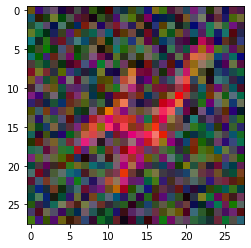

In [4]:
colors={0: 'red',1: 'green'}
x,y,c=create_example(x_train[9],y_train[9])
print(f'digit: {y}, color: {colors[c]}')
plt.imshow(x)
plt.show

## Task 3: Dataset Generator

In [5]:
def generate_data(x,y,batch_size=32):
  num_examples=len(y)

  while True:
    x_batch=np.zeros((batch_size,28,28,3))
    y_batch=np.zeros((batch_size,))
    c_batch=np.zeros((batch_size,))

    for i in range(0,batch_size):
      index=np.random.randint(0,num_examples)
      image,digit,color=create_example(x[index],y[index])
      x_batch[i]=image
      y_batch[i]=digit
      c_batch[i]=color

  yield x_batch,[y_batch,c_batch]


In [7]:
x,[y,c]=next(generate_data(x_test,y_test,batch_size=1))

KeyboardInterrupt: ignored

4 0


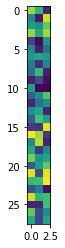

In [8]:
print(y,c)
plt.imshow(x[0]);

## Task 4: Create Model

In [12]:
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPool2D, Flatten, Add, Dense
input_=Input(shape=(28,28,3), name='input')
conv_1=Conv2D(32,3,name='conv_1')(input_)
act_1=Activation('relu',name='act_1')(conv_1)
pool_1=MaxPool2D(4,name='pool_1')(act_1)
flat_1=Flatten(name='flat_1')(pool_1)
color=Dense(1,activation='sigmoid',name='color')(flat_1)


conv_2=Conv2D(32,3,padding='same',name='conv_2')(act_1)
act_2=Activation('relu',name='act_2')(conv_2)

conv_3=Conv2D(32,3,padding='same',name='conv_3')(act_2)
add=Add(name='add')([act_1,conv_3])

pool_2=MaxPool2D(4,name='pool_2')(act_2)
flat_2=Flatten(name='flat_2')(pool_2)

digit=Dense(10,activation='softmax',name='digit')(flat_2)

model=tf.keras.models.Model(input_,[digit,color])
model.compile(
    loss=
    {'digit':'sparse_categorical_crossentropy',
     'color':'binary_crossentropy'},
     optimizer='adam',
     metrics=['accuracy']
    )



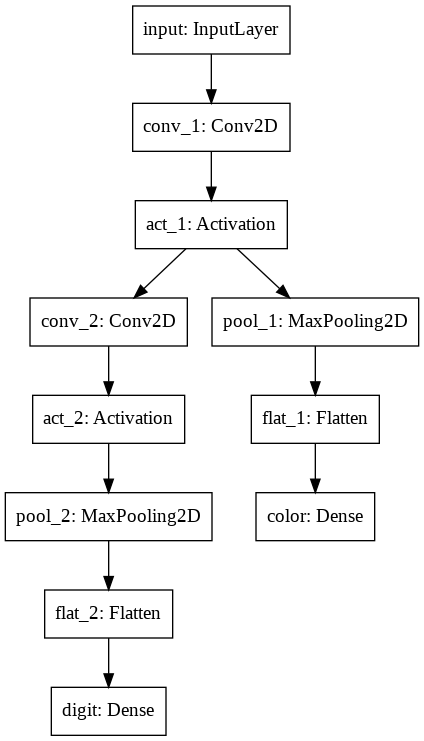

In [14]:
tf.keras.utils.plot_model(model)

## Task 5: Training the Model

In [15]:
class Logger(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    digit_accuracy = logs.get('digit_accuracy')
    color_accuracy = logs.get('color_accuracy')
    val_digit_accuracy = logs.get('val_digit_accuracy')
    val_color_accuracy = logs.get('val_color_accuracy')
    print('='*30, epoch + 1, '='*30)
    print(f'digit_accuracy: {digit_accuracy:.2f}, color_accuracy: {color_accuracy:.2f}')
    print(f'val_digit_accuracy: {val_digit_accuracy:.2f}, val_color_accuracy: {val_color_accuracy:.2f}')

In [ ]:
train_gen=generate_data(x_train,y_train)
test_gen=generate_data(x_test,y_test)
_=model.fit(
    train_gen,
    validation_data=test_gen,
    steps_per_epoch=200,
    validation_steps=100,
    epochs=10,
    callbacks=[
               Logger(),
               tf.keras.callbacks.TensorBoard(log_dir='./logs')
    ],
    verbose=False
)

In [ ]:
%tensorboard --logdir logs

## Task 6: Final Predictions

In [ ]:
def test_model(show=True):
  x, [y, c] = next(test)
  
  preds = model.predict(x)
  pred_digit = np.argmax(preds[0])
  pred_color = int(preds[1] > 0.5)
  gt_digit = int(y[0])
  gt_color = int(c[0])
  
  plt.imshow(x[0])
  if show:
    print(f'GT: {gt_digit}, {colors[gt_color]}')
    print(f'Pr: {pred_digit}, {colors[pred_color]}')
    plt.show()
  else:
    col = 'green' if gt_digit == pred_digit and gt_color == pred_color else 'red'
    plt.ylabel(f'GT: {gt_digit}, {colors[gt_color]}', color=col)
    plt.xlabel(f'Pr: {pred_digit}, {colors[pred_color]}', color=col)
    plt.xticks([])
    plt.yticks([])


test = generate_data(x_test, y_test, batch_size=1)

In [ ]:
test_model()

In [ ]:
plt.figure(figsize=(12,13))
for i in range(0,16):
  plt.subplot(4,4,i+1)
  test_mdodel(show=False)
plt.show()  